## Description of all input files and data for the `TRSL` and `TRSL_specific` models

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cPickle as pkl
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

Initiation rates according to Ciandrini, Stansfield et al. (2013) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002866).
- Measurement of polysomal ribosome density
- Modelling of polysomal ribosome density
- Reverse engineer initiation rate

In [3]:
stansfield_ips = pkl.load(open('../../parameters/init_rates_stansfield.p'))
print len(stansfield_ips)

5841


Initiation rates according to Shah, Plotkin et al. (2014) (http://dx.doi.org/10.1016%2Fj.cell.2013.05.049)

In [4]:
plotkin_ips = pkl.load(open('../../parameters/init_rates_plotkin.p'))
print len(plotkin_ips)

4839


How many are in common:

In [5]:
plotkeys = stansfield_ips.viewkeys() & plotkin_ips.viewkeys() # set intersection
print len(plotkeys)

4606


Scatter plot and lowess fit of initiation probabilities:

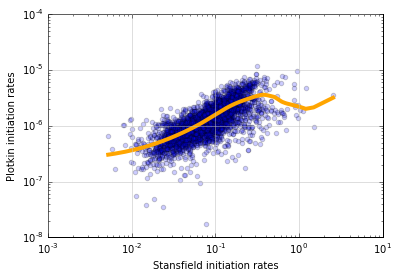

In [6]:
xs = [stansfield_ips[key] for key in plotkeys]
ys = [plotkin_ips[key] for key in plotkeys] 

fig =  plt.figure()                

ax = fig.add_subplot(111)
ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Stansfield initiation rates')
ax.set_ylabel('Plotkin initiation rates')

scat = plt.scatter(xs, ys)
scat.set_alpha(0.2)

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points]
new_ys = [point[1] for point in sorted_points]
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, 'orange', linewidth=4)

plt.show()

Low correlation between the two parameter sets. There are also orders of magnitude between the two, indicating a different meaning.

Decay constants according to Belle, O'Shea et al. (2006) (http://www.pnas.org/content/103/35/13004.full)

In [7]:
decay_constants = pkl.load(open('../../parameters/decay_constants.p'))
len(decay_constants)

3751

In [8]:
data = decay_constants.values()
pd.Series(data).describe()

count    3.751000e+03
mean     5.101195e-04
std      9.677979e-04
min      9.959269e-08
25%      1.004561e-04
50%      2.357643e-04
75%      4.443251e-04
max      5.776227e-03
dtype: float64

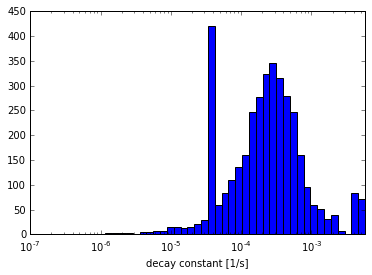

In [9]:
plt.hist(data, bins = 10**np.linspace(np.log10(min(data)), np.log10(max(data)), 50))
plt.gca().set_xscale("log")
plt.gca().set_xlim([min(data), max(data)])
plt.gca().set_xlabel('decay constant [1/s]')
plt.show()

Number of genes for which initiation rates and decay constants are available:

In [10]:
print 'Decay constants with Stansfield init. rates:', len(stansfield_ips.viewkeys()&decay_constants.viewkeys())
print 'Decay constants with Plotkin init. rates:', len(plotkin_ips.viewkeys()&decay_constants.viewkeys())

Decay constants with Stansfield init. rates: 3603
Decay constants with Plotkin init. rates: 3471


Transcriptome according to Lipson et al. (2009) (http://www.ncbi.nlm.nih.gov/pubmed/19581875), using single-molecule sequencing digital gene expression (smsDGE)

In [11]:
transcriptome = pkl.load(open("../../parameters/transcriptome.p"))
len(transcriptome)

6710

All yeast ORFs (http://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/):

ORF Coding Sequences (CDS) only, without 5'-UTR, 3'-UTR, intron sequences, or bases not translated due to translational frameshifting, for all "Verified" and "Uncharacterized" ORFs, and transposable element genes. 

Does NOT include sequences for ORFs classified as "Dubious" or "pseudogene".

In [12]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))
len(orf_genomic_dict)

6713

Lengths of yeast ORFs:

In [13]:
orf_lengths = {key: len(orf_genomic_dict[key]) for key in orf_genomic_dict}

Connection between ORF lengths and initiation rates:

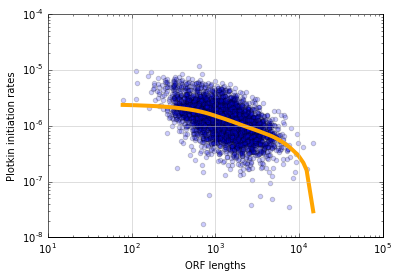

In [14]:
plotkeys = orf_lengths.viewkeys() & plotkin_ips.viewkeys()
xs = [orf_lengths[key] for key in plotkeys]
ys = [plotkin_ips[key] for key in plotkeys] 
fig =  plt.figure()                

ax = fig.add_subplot(111)
ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('ORF lengths')
ax.set_ylabel('Plotkin initiation rates')

scat = plt.scatter(xs, ys)
scat.set_alpha(0.2)

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points]
new_ys = [point[1] for point in sorted_points]
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, 'orange', linewidth=4)

plt.show()

Filling the Venn diagram of Plotkin initiation rates $R$, exome $X$ and transcriptome $T$:

$ R \cap T \cap X $:

In [15]:
len(plotkin_ips.viewkeys() & orf_genomic_dict.viewkeys() & transcriptome.viewkeys())

4716

$ \bar{R} \cap T \cap X $:

In [16]:
len(orf_genomic_dict.viewkeys() & transcriptome.viewkeys()) - _

1987

$ R \cap T \cap \bar{X} $:

In [17]:
len(plotkin_ips.viewkeys() & transcriptome.viewkeys()) - 4989

-273

$ R \cap \bar{T} \cap X $:

In [18]:
len(plotkin_ips.viewkeys() & orf_genomic_dict.viewkeys()) - 4989

-273